In [1]:
%load_ext autoreload

In [2]:
%autoreload 2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from tqdm.auto import tqdm
from pathlib import Path

import os
import sys
sys.path.append(r'C:\Users\matt_analysis\Documents\GitHub\caImageAnalysis')

#local imports
from fishy import WorkingFish, BaseFish, VizStimVolume, PurgeFish

import process
import stimuli
from constants import monocular_dict, baseBinocs, deg_dict
from utilities import arrutils

In [3]:
basePath = Path(r'D:\Data\Imaging\2022\Nov102022_5dpf\fish4')

fish_paths = []
with os.scandir(basePath) as entries:
    for entry in entries:
        if os.path.isdir(entry.path):
            fish_paths.append(entry.path)

In [6]:
fish_paths

['D:\\Data\\Imaging\\2022\\Nov102022_5dpf\\fish4\\img_stack_0',
 'D:\\Data\\Imaging\\2022\\Nov102022_5dpf\\fish4\\img_stack_1',
 'D:\\Data\\Imaging\\2022\\Nov102022_5dpf\\fish4\\img_stack_2',
 'D:\\Data\\Imaging\\2022\\Nov102022_5dpf\\fish4\\img_stack_3',
 'D:\\Data\\Imaging\\2022\\Nov102022_5dpf\\fish4\\img_stack_4']

In [34]:
bf = WorkingFish(folder_path=fish_paths[0],
                 legacy=True,
                 stim_fxn=stimuli.legacy_struct_pandastim_to_df,
                 stim_fxn_args={"stimkey":"matt"})

found and loaded frametimes h5


C:\Users\matt_analysis\Documents\GitHub\caImageAnalysis\stimuli.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mini_stim.stim_name = pd.Series(mini_stim.stim_name, dtype="category")
C:\Users\matt_analysis\Documents\GitHub\caImageAnalysis\stimuli.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mini_stim_vel.stim_name = pd.Series(mini_stim.stim_name, dtype="category")


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


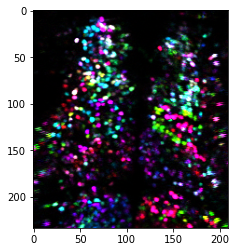

In [36]:
d = bf.make_difference_image()
plt.imshow(d)

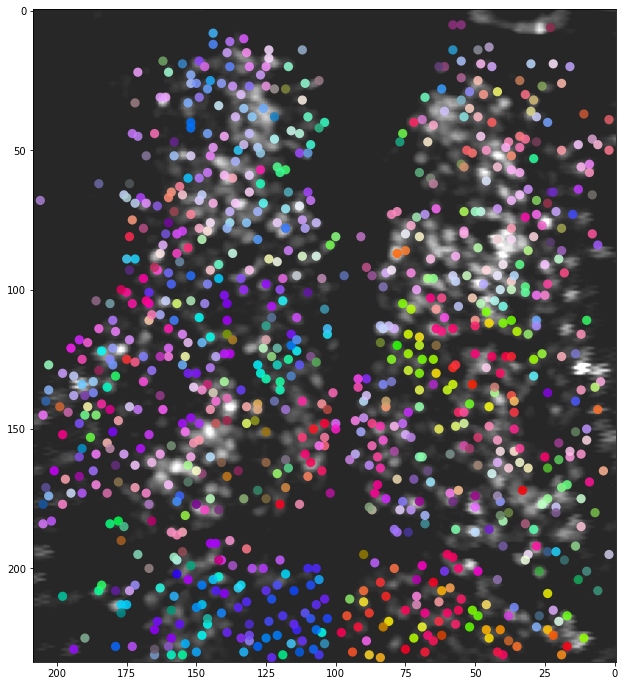

In [42]:
xpos, ypos, colors, neurons = bf.make_computed_image_data()
refimg = bf.ops['refImg']

fig = plt.figure(figsize=(12,12))
plt.scatter(xpos, ypos, color=colors, alpha=.85, s=85, edgecolors='none')
plt.imshow(refimg, cmap='gray', alpha=0.85, vmax=np.percentile(refimg, 99.9), vmin=np.percentile(refimg, 50))
plt.gca().invert_xaxis()

plt.show()

In [43]:
fishvolume = VizStimVolume()
for p in fish_paths:

    _ = WorkingFish(folder_path=p,
                    legacy=True,
                    stim_fxn=stimuli.legacy_struct_pandastim_to_df,
                    stim_fxn_args={"stimkey":"matt"})
    fishvolume.add_volume(_)

found and loaded frametimes h5


C:\Users\matt_analysis\Documents\GitHub\caImageAnalysis\stimuli.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mini_stim.stim_name = pd.Series(mini_stim.stim_name, dtype="category")
C:\Users\matt_analysis\Documents\GitHub\caImageAnalysis\stimuli.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mini_stim_vel.stim_name = pd.Series(mini_stim.stim_name, dtype="category")
C:\Users\matt_analysis\Documents\GitHub\caImageAnalysis\fishy.py:353: SettingWithCopyWarning: 
A value is trying to be set on a copy

found and loaded frametimes h5


C:\Users\matt_analysis\Documents\GitHub\caImageAnalysis\stimuli.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mini_stim.stim_name = pd.Series(mini_stim.stim_name, dtype="category")
C:\Users\matt_analysis\Documents\GitHub\caImageAnalysis\stimuli.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mini_stim_vel.stim_name = pd.Series(mini_stim.stim_name, dtype="category")
C:\Users\matt_analysis\Documents\GitHub\caImageAnalysis\fishy.py:353: SettingWithCopyWarning: 
A value is trying to be set on a copy

found and loaded frametimes h5


C:\Users\matt_analysis\Documents\GitHub\caImageAnalysis\stimuli.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mini_stim.stim_name = pd.Series(mini_stim.stim_name, dtype="category")
C:\Users\matt_analysis\Documents\GitHub\caImageAnalysis\stimuli.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mini_stim_vel.stim_name = pd.Series(mini_stim.stim_name, dtype="category")
C:\Users\matt_analysis\Documents\GitHub\caImageAnalysis\fishy.py:353: SettingWithCopyWarning: 
A value is trying to be set on a copy

found and loaded frametimes h5


C:\Users\matt_analysis\Documents\GitHub\caImageAnalysis\stimuli.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mini_stim.stim_name = pd.Series(mini_stim.stim_name, dtype="category")
C:\Users\matt_analysis\Documents\GitHub\caImageAnalysis\stimuli.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mini_stim_vel.stim_name = pd.Series(mini_stim.stim_name, dtype="category")
C:\Users\matt_analysis\Documents\GitHub\caImageAnalysis\fishy.py:353: SettingWithCopyWarning: 
A value is trying to be set on a copy

found and loaded frametimes h5


C:\Users\matt_analysis\Documents\GitHub\caImageAnalysis\stimuli.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mini_stim.stim_name = pd.Series(mini_stim.stim_name, dtype="category")
C:\Users\matt_analysis\Documents\GitHub\caImageAnalysis\stimuli.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mini_stim_vel.stim_name = pd.Series(mini_stim.stim_name, dtype="category")


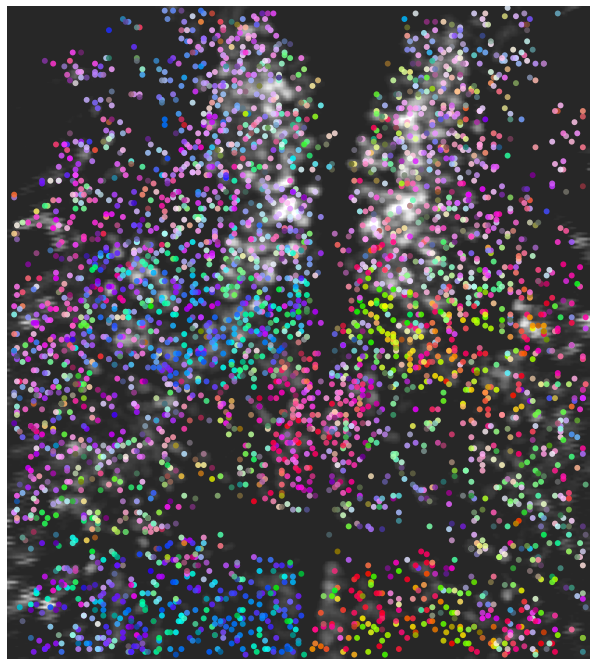

In [44]:
xpos, ypos, colors, neurons = fishvolume.volume_computed_image()
refimg = fishvolume[2].ops['refImg']

fig = plt.figure(figsize=(12,12))
plt.scatter(xpos, ypos, color=colors, alpha=.85, s=35, edgecolors='none')
plt.imshow(refimg, cmap='gray', alpha=0.85, vmax=np.percentile(refimg, 99.9), vmin=np.percentile(refimg, 50))
plt.gca().invert_xaxis()

plt.axis('off')
plt.margins(x=0, y=0)

extent = plt.gca().get_window_extent().transformed(fig.dpi_scale_trans.inverted())

plt.show()